# Workshop #2 :
## Reccobeats API - EDA

------------------------------------------------------------

https://reccobeats.com/docs/apis/extract-audio-features

In [23]:
import os
import sys
import pandas as pd
import numpy as np
import logging


sys.path.append(os.path.abspath('../'))
from src.params import Params
from src.client import DatabaseClient
from src.logging_config import setup_logging

In [24]:
setup_logging()

In [25]:
df = pd.read_csv("../data/external/reccobeats_features.csv")

The dimensions of the data set are 90 rows and 10 columns.

In [26]:
df.shape

(90, 10)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   nominee           90 non-null     object 
 1   acousticness      90 non-null     float64
 2   danceability      90 non-null     float64
 3   energy            90 non-null     float64
 4   instrumentalness  90 non-null     float64
 5   liveness          90 non-null     float64
 6   loudness          90 non-null     float64
 7   speechiness       90 non-null     float64
 8   tempo             90 non-null     float64
 9   valence           90 non-null     float64
dtypes: float64(9), object(1)
memory usage: 7.2+ KB


The dataset contains 90 registers with cero null values.There are 9 columns with data type of `float64`, and one with an `object` data type. The former column is an addition to differentiate the song in each entry. The 9 columns with data type of `float64` correspond to the data extracted from the ReccoBeats API, and aaccording to is documentation they are described as follows:

### Recobeats Documentation for the Responses in "The Audio Feature Extraction API"

**acousticness** `float`

Acousticness refers to how much of a song or piece of music is made up of natural, organic sounds rather than synthetic or electronic elements. In other words, it's a measure of how "acoustic" a piece of music sounds. A confidence measure from 0.0 to 1.0, greater value represents higher confidence the track is acoustic.


**danceability** `float`

Danceability is a measure of how suitable a song is for dancing, ranging from 0 to 1. A score of 0 means the song is not danceable at all, while a score of 1 indicates it is highly danceable. This score takes into account factors like tempo, rhythm, beat consistency, and energy, with higher scores indicating stronger, more rhythmically engaging tracks.


**energy** `float`

Energy in music refers to the intensity and liveliness of a track, with a range from 0 to 1. A score of 0 indicates a very calm, relaxed, or low-energy song, while a score of 1 represents a high-energy, intense track. It’s influenced by elements like tempo, loudness, and the overall drive or excitement in the music.


**instrumentalness** `float`

Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.


**liveness** `float`

Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.


**loudness** `float`

The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.


**speechiness** `float`

Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.


**tempo** `float`

The overall estimated tempo of a track in beats per minute (BPM). Values typical range between 0 and 250


**valence** `float`

Valence in music measures the emotional tone or mood of a track, with a range from 0 to 1. A score of 0 indicates a song with a more negative, sad, or dark feeling, while a score of 1 represents a more positive, happy, or uplifting mood. Tracks with a high valence tend to feel joyful or energetic, while those with a low valence may evoke feelings of melancholy or sadness.

## Finding duplicated rows

In [28]:
# Find duplicated rows
duplicated_rows = df[df.duplicated(keep=False)]  # Keep all duplicates (including the first occurrence)

duplicated_rows


,nominee,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence


There are not duplicated songs in the dataset for us to handle.

## Descriptive Statistics

In [29]:
df.describe()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,0.637317,0.523082,0.273932,0.282654,0.137283,-16.484924,0.075898,104.034413,0.341602
std,0.278695,0.174848,0.180159,0.355994,0.043555,4.833190,0.061183,15.047175,0.221086
min,0.009100,0.078300,0.000000,0.000000,0.091100,-29.257900,0.015700,54.993200,0.048200
25%,0.402750,0.385525,0.131525,0.012700,0.111750,-19.715400,0.042825,96.424600,0.179475
50%,0.742850,0.497950,0.224400,0.048700,0.119600,-16.180150,0.051350,103.443850,0.275850
75%,0.856325,0.670775,0.409850,0.673425,0.143600,-12.983525,0.080600,111.634900,0.474075
max,0.988500,0.872600,0.744400,0.940500,0.345900,-6.322100,0.360200,159.898400,0.924300


### Observations:

1. **Acousticness**:
   - Mean: 0.637 suggests that, on average, the tracks lean toward being acoustic.
   - Min: 0.009 indicates the presence of tracks with almost no acoustic elements.
   - Max: 0.989 showcases highly acoustic tracks in the dataset.

2. **Danceability**:
   - Mean: 0.523 suggests that the tracks are moderately suitable for dancing.
   - Min: 0.078 shows that some tracks are hardly danceable.
   - Max: 0.873 represents tracks that are highly rhythmic and great for dancing.

3. **Energy**:
   - Mean: 0.274 indicates that the tracks are generally low-energy.
   - Min: 0.0 confirms the presence of very calm, subdued tracks.
   - Max: 0.744 points to tracks with moderate to high energy levels.

4. **Instrumentalness**:
   - Mean: 0.283 indicates that most tracks are not predominantly instrumental.
   - Tracks closer to a value of 1.0 (max: 0.941) are likely instrumental.

5. **Liveness**:
   - Mean: 0.137 suggests most tracks do not have significant live-audience features.
   - Max: 0.346 indicates the occasional presence of live recordings, though not predominant.

6. **Loudness**:
   - Mean: -16.485 dB reflects relatively quiet tracks.
   - Min: -29.258 dB and Max: -6.322 dB demonstrate a considerable range in loudness.

7. **Speechiness**:
   - Mean: 0.076 suggests that most tracks have very low spoken-word content.
   - Max: 0.360 indicates only a small number of tracks have moderate speech elements.

8. **Tempo**:
   - Mean: 104.03 BPM suggests a moderate tempo for tracks.
   - Min: 54.99 BPM and Max: 159.90 BPM confirm a variety of pacing.

9. **Valence**:
   - Mean: 0.342 indicates that the tracks tend to have a more neutral-to-negative emotional tone.
   - Min: 0.048 represents very melancholic tracks.
   - Max: 0.924 points to some tracks with very positive and uplifting moods.

## Confirming the dataset's values align with the descriptions of their meanings

### Range Validations

Ensure that the values in each column are within the expected ranges.

In [30]:
# Define expected ranges for features
ranges = {
    "acousticness": (0.0, 1.0),
    "danceability": (0.0, 1.0),
    "energy": (0.0, 1.0),
    "instrumentalness": (0.0, 1.0),
    "liveness": (0.0, 1.0),
    "loudness": (-60.0, 0.0),
    "speechiness": (0.0, 1.0),
    "tempo": (0.0, 250.0),
    "valence": (0.0, 1.0)
}

# Function to check ranges
def validate_ranges(dataframe, ranges):
    for column, (min_val, max_val) in ranges.items():
        invalid_values = dataframe[(dataframe[column] < min_val) | (dataframe[column] > max_val)]
        if not invalid_values.empty:
            logging.info(f"Invalid values found in {column}:\n", invalid_values)
        else:
            logging.info(f"All values in {column} are within the valid range.")

# Run range validation
validate_ranges(df, ranges)


2025-04-10 18:06:38,009 - INFO - root - All values in acousticness are within the valid range.
2025-04-10 18:06:38,012 - INFO - root - All values in danceability are within the valid range.
2025-04-10 18:06:38,013 - INFO - root - All values in energy are within the valid range.
2025-04-10 18:06:38,015 - INFO - root - All values in instrumentalness are within the valid range.
2025-04-10 18:06:38,017 - INFO - root - All values in liveness are within the valid range.
2025-04-10 18:06:38,020 - INFO - root - All values in loudness are within the valid range.
2025-04-10 18:06:38,022 - INFO - root - All values in speechiness are within the valid range.
2025-04-10 18:06:38,025 - INFO - root - All values in tempo are within the valid range.
2025-04-10 18:06:38,027 - INFO - root - All values in valence are within the valid range.


### Unit consistency checks

In [31]:
def check_unit_consistency(dataframe, column):
    if not pd.to_numeric(dataframe[column], errors="coerce").notnull().all():
        print(f"Inconsistent units found in {column}")
    else:
        print(f"Units are consistent in {column}")

for column in ["tempo", "loudness"]:
    check_unit_consistency(df, column)

Units are consistent in tempo
Units are consistent in loudness


### Tracks with high instrumentalness should have low speechiness

In [32]:
unexpected_values = df[(df["instrumentalness"] > 0.5) & (df["speechiness"] > 0.33)]
if not unexpected_values.empty:
    logging.info("Unexpected tracks (high instrumentalness with high speechiness):\n", unexpected_values)

### Distributions

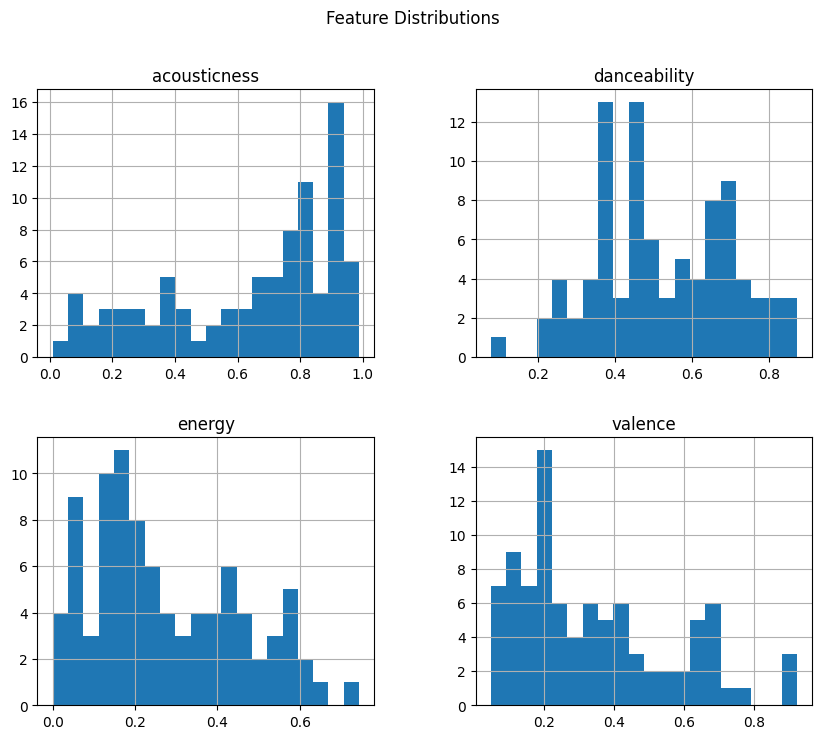

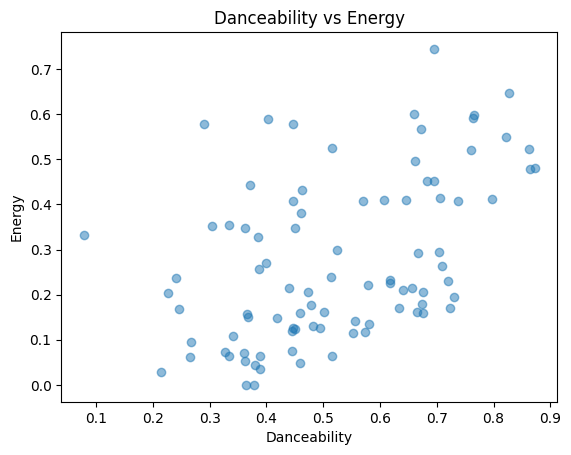

In [33]:
import matplotlib.pyplot as plt

# Histogram for each feature
df.hist(column=["acousticness", "danceability", "energy", "valence"], bins=20, figsize=(10, 8))
plt.suptitle("Feature Distributions")
plt.show()

# Scatterplot for relationships
plt.scatter(df["danceability"], df["energy"], alpha=0.5)
plt.title("Danceability vs Energy")
plt.xlabel("Danceability")
plt.ylabel("Energy")
plt.show()

#### **1. Acousticness**
The distribution is heavily skewed towards higher values, with a peak around **0.9**. This suggests that most tracks in the dataset are acoustic, featuring predominantly organic sounds.

#### **2. Danceability**
The distribution is multimodal, with prominent peaks near **0.4** and **0.6**, indicating a variety in danceability. Tracks range from moderately suitable to well-suited for dancing.

#### **3. Energy**
This distribution is strongly skewed towards lower values, peaking around **0.1–0.2**. It reveals that many tracks are calm and low-energy, with fewer tracks exhibiting higher intensity.

#### **4. Valence**
The distribution peaks near **0.2**, showing that a significant portion of tracks evoke low-valence emotions like sadness or melancholy. Fewer tracks are found with high valence (positive mood).

## Atypical values

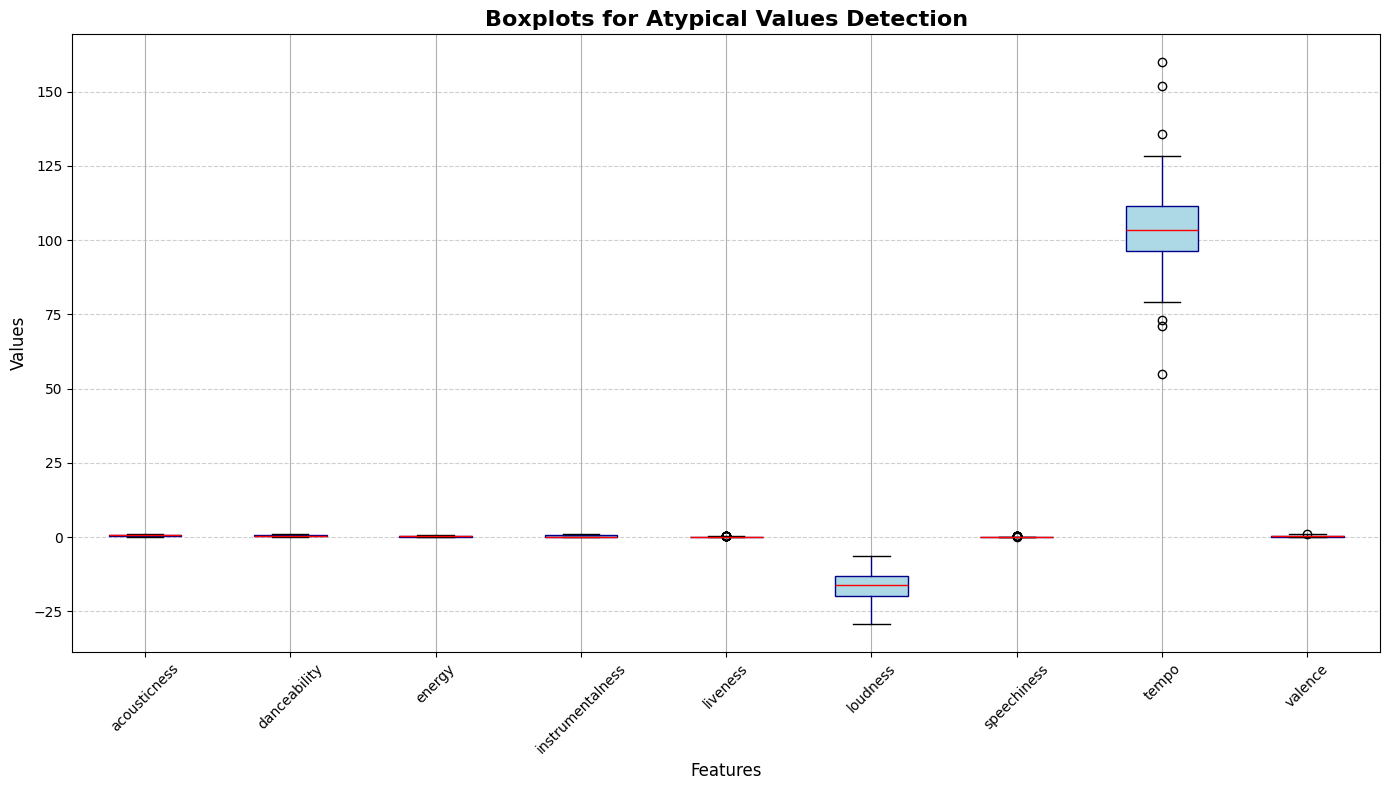

In [34]:
# Columns to check for atypical values
columns_to_check = [
    "acousticness", "danceability", "energy", "instrumentalness", 
    "liveness", "loudness", "speechiness", "tempo", "valence"
]

# Function to visualize distributions with boxplots
def visualize_boxplots(dataframe, columns):
    """
    Generate boxplots for the specified columns to detect atypical values.
    
    Parameters:
    - dataframe: pd.DataFrame, the dataset containing the data.
    - columns: list of str, names of columns to plot.
    """
    plt.figure(figsize=(14, 8))  # Set a larger figure for better readability
    dataframe[columns].boxplot(
        patch_artist=True,  # Color the boxes for aesthetics
        boxprops=dict(facecolor='lightblue', color='darkblue'),  # Set box colors
        medianprops=dict(color='red'),  # Highlight medians in red
        whiskerprops=dict(color='darkblue')  # Style whiskers
    )
    plt.title("Boxplots for Atypical Values Detection", fontsize=16, weight='bold')
    plt.xlabel("Features", fontsize=12)
    plt.ylabel("Values", fontsize=12)
    plt.xticks(rotation=45, fontsize=10)  # Rotate x-axis labels for better visibility
    plt.grid(axis='y', linestyle="--", alpha=0.6)  # Add a grid for easier analysis
    plt.tight_layout()  # Adjust layout to fit the figure neatly
    plt.show()

# Call the function to visualize boxplots
visualize_boxplots(df, columns_to_check)

In [35]:
# Function to count outliers using IQR
def count_outliers_iqr(dataframe, columns):
    outliers_count = {}
    for column in columns:
        Q1 = dataframe[column].quantile(0.25)
        Q3 = dataframe[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = dataframe[(dataframe[column] < lower_bound) | (dataframe[column] > upper_bound)]
        outliers_count[column] = len(outliers)
    return outliers_count


# Count outliers using IQR
iqr_outliers = count_outliers_iqr(df, columns_to_check)
print("\nOutlier Counts using IQR:")
for column, count in iqr_outliers.items():
    print(f"{column}: {count}")


Outlier Counts using IQR:
acousticness: 0
danceability: 0
energy: 0
instrumentalness: 0
liveness: 12
loudness: 0
speechiness: 9
tempo: 6
valence: 1


We can see `speechiness`, `tempo` and  `valence` have atypical values based on IQR. As these outliers represent real phenomena (e.g., characteristics of real songs given by an algorithm), they can offer unique insights, so we retain them.


## Saving the DataFrame as a CSV file

In [36]:

df.to_csv('../data/intermediate/api.csv', index=False)

logging.info("DataFrame has been saved to '../data/intermediate/api.csv'")

2025-04-10 18:06:39,103 - INFO - root - DataFrame has been saved to '../data/intermediate/api.csv'
